In [63]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

## Exercise 1

See the separate notebook for the proof.

## Exercise 3

The suze $\alpha$ Wald test rejects if and only if
$$\left|\frac{\hat{\theta} - \theta_0}{\widehat{\text{se}}}\right| > z_{\alpha/2},$$
that is when
$$\theta_0 \notin (\hat{\theta} - \widehat{\text{se}}\, z_{\alpha/2}, \hat{\theta} + \widehat{\text{se}}\, z_{\alpha/2}).$$

## Exercise 5

The value $Y = \max(X_1, \dots, X_n)$ acts as the test statistic in this case.

(a) Using the density of $Y$ derived in Exercise 4 in Chapter 9, we have
$$\beta(\theta) = \mathbb{P}_\theta(Y > c) = \mathbb{1}_{[0, \theta]}(c) \int_c^\theta \frac{n}{\theta} \left(\frac{y}{\theta}\right)^n dy = \left(1 - \left(\frac{c}{\theta}\right)^n\right) \mathbb{1}_{[0, \theta]}(c).$$

(b) By Definition 10.1, the size of the test
$$\alpha = \sup_{\theta \in \Theta_0} \beta(\theta) = (1 - (2c)^n) \mathbb{1}_{[0, \frac{1}{2}]}(c),$$
since $\Theta_0 = \{\frac{1}{2}\}$.

The value of $c$ that makes the size of the test $\alpha$ is given by
$$c = \frac{1}{2}(1 - \alpha)^{1/n}.$$

(c) By Theorem 10.12,
$$\text{p-value} = \mathbb{P}_{\theta_0}(T(X^n) \geq Y) = (1 - (2Y)^n) \mathbb{1}_{[0, \frac{1}{2}]}(c).$$

In [10]:
def pvalue(Y, n):
    return 1 - (2 * Y) ** n if Y >= 0 and Y <= 0.5 else 0

In [11]:
pvalue(0.48, 20)

0.5579975661205926

Since the p-value is large, we do not reject $H_0$.

(d)

In [12]:
pvalue(0.52, 20)

0

We reject $H_0$.

In fact, we can see that this test will reject the null hypothesis if and only if $Y > \frac{1}{2}$.

## Exercise 6

Denoting by $X_1 = 922$ the number of people who died before the holiday, by $X_2 = 997$ the number of people who died after the holiday and by $n = X_1 + X_2 = 1919$ the total number of people, we define the Pearson's $\chi^2$ statistic 
$$T = \frac{X_1 - n (1 - p_0)}{n (1 - p_0)} + \frac{X_2 - n p_0}{n p_0},$$
where the null hypothesis is that the probability of dying after a holiday is $p = p_0$.

In [18]:
X1 = 922
X2 = 997
n = X1 + X2
p0 = 0.5
k = 2

In [16]:
T = (X1 - n * (1 - p0)) ** 2 / n / (1 - p0) + (X2 - n * p0) ** 2 / n / p0
T

2.931214174048984

Using Theorem 10.17, the p-value is $\mathbb{P}(\chi_{k-1}^2 > t)$:

In [19]:
stats.chi2.sf(T, df=k - 1)

np.float64(0.08688212846769013)

At 95% confidence level, we do not reject the null hypothesis.

The estimate of $p$ is:

In [72]:
p_hat = X2 / n
p_hat

0.5195414278269932

The variance of the estimate is given by
$$\mathbb{V}\left[\frac{X_2}{n}\right] = \frac{\mathbb{V}[X_2]}{n^2} = \frac{n p(1 - p)}{n^2} = \frac{p(1-p)}{n}.$$

In [74]:
se = np.sqrt(p_hat * (1 - p_hat) / n)
se

np.float64(0.011405138868050746)

Assuming asymptotic normality, we get the 90% confidence interval:

In [75]:
alpha = 0.05
p_hat + stats.norm.ppf([alpha / 2, 1 - alpha / 2]) * se

array([0.49718777, 0.54189509])

## Exercise 7

(a) We follow Example 10.8 using the non-parametric plug-in estimator for the difference of means
$$\hat{\delta} = \overline{X} - \overline{Y}$$
and for the standard error
$$\widehat{\text{se}} = \sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}},$$
where $s_1^2$ and $s_2^2$ are sample variances and $n_1$, $n_2$ are the numbers of elements in each of the two samples.

In [21]:
X = np.array([.225, .262, .217, .240, .230, .229, .235, .217])
Y = np.array([.209, .205, .196, .210, .202, .207, .224, .223, .220, .201])

In [46]:
def wald_statistic(X, Y):
    delta = np.mean(X) - np.mean(Y)
    se = np.sqrt(np.var(X, ddof=1) / X.shape[0] + np.var(Y, ddof=1) / Y.shape[0])
    return np.abs(delta / se), delta, se

In [47]:
W, delta, se = wald_statistic(X, Y)

In [49]:
delta

np.float64(0.022175)

In [50]:
se

np.float64(0.005987492751097445)

In [48]:
W

np.float64(3.7035535443338206)

The p-value is:

In [32]:
2 * stats.norm.sf(W)

np.float64(0.00021260028225810121)

The 95% confidence interval for the difference in means is:

In [30]:
alpha = 0.05
delta + stats.norm.ppf([alpha / 2, 1 - alpha / 2]) * se

array([0.01043973, 0.03391027])

We can see that the p-value is very small, and the 95% confidence interval does not include 0, so we reject the null hypothesis.

(b) For the permutation method, we assume both $X$ and $Y$ came from the same distribution.

In [40]:
rng = np.random.default_rng(12345)

In [51]:
m = 1000

In [53]:
W_star = stats.bootstrap(
    (np.concatenate([X, Y]),), 
    lambda xy: wald_statistic(xy[:X.shape[0]], xy[X.shape[0]:])[0],
    n_resamples=m,
    random_state=rng,
).bootstrap_distribution

The permutation p-value is:

In [55]:
np.mean(W_star > W)

np.float64(0.002)

Since the p-value is very small, we reject the null hypothesis.

## Exercise 8

Since $T(X^n) = n^{-1} \sum_{i=1}^n X_i$ and $X_i \sim N(\theta, 1)$, we have $T(X^n) \sim N(\theta, \frac{1}{n})$.

$\Theta_0 = \{0\}$ and $\Theta_1 = \{1\}$.

(a) We have
$$\alpha = \sup_{\theta \in \Theta_0} \mathbb{P}_\theta(T(X^n) > c) = 1 - \Phi(c \sqrt{n}),$$
so
$$c = \frac{1}{\sqrt{n}} z_\alpha.$$

If $c > 0$, $\alpha \to 0$ as $n \to \infty$. If $c < 0$, $\alpha \to 1$ as $n \to \infty$, so the test becomes useless as it always rejects the null.

(b) Under $H_1$, $T(X^n) \sim N(1, \frac{1}{n})$, therefore
$$\beta(1) = \mathbb{P}_1(T(X^n) > c) = 1 - \Phi(\sqrt{n}(c - 1)).$$

(c) If we use the value of $c$ found in (a), we obtain
$$\beta(1) = 1 - \Phi(z_\alpha - \sqrt{n}),$$
so $\beta(1) \to 1$ as $n \to \infty$.

## Exercise 9

We have
$$\begin{split}
\beta(\theta_1) 
&= \mathbb{P}_{\theta_1}\left(\frac{|\hat{\theta} - \theta_0|}{\widehat{\text{se}}} > z_{\alpha / 2}\right) \\
&= \mathbb{P}_{\theta_1}\left(\frac{\hat{\theta} - \theta_0}{\widehat{\text{se}}} < -z_{\alpha / 2}\right) + \mathbb{P}_{\theta_1}\left(\frac{\hat{\theta} - \theta_0}{\widehat{\text{se}}} > z_{\alpha / 2}\right) \\
&= \mathbb{P}_{\theta_1}\left(\frac{\hat{\theta} - \theta_1}{\widehat{\text{se}}} < \frac{\theta_0 - \theta_1}{\widehat{\text{se}}} -z_{\alpha / 2}\right) + \mathbb{P}_{\theta_1}\left(\frac{\hat{\theta} - \theta_1}{\widehat{\text{se}}} > \frac{\theta_0 - \theta_1}{\widehat{\text{se}}} + z_{\alpha / 2}\right) \\
&= \Phi\left(\frac{\theta_0 - \theta_1}{\widehat{\text{se}}} -z_{\alpha / 2}\right) + 1 - \Phi\left(\frac{\theta_0 - \theta_1}{\widehat{\text{se}}} + z_{\alpha / 2}\right) \\
\end{split}.$$

As $n \to \infty$, $\widehat{\text{se}} = \{n I(\hat{\theta})\}^{-1/2} \to 0$. Since $\theta_0 < \theta_1$, we have
$$\Phi\left(\frac{\theta_0 - \theta_1}{\widehat{\text{se}}} -z_{\alpha / 2}\right) \to 0$$
and
$$\Phi\left(\frac{\theta_0 - \theta_1}{\widehat{\text{se}}} + z_{\alpha / 2}\right) \to 0,$$
so
$$\beta(\theta_1) \to 1.$$

## Exercise 10

We use the likelihood ratio test with $\Theta = \{(p_{1,1}, p_{1,2}, p_{1,3}, p_{1,4}, p_{2,1}, p_{2,2}, p_{2,3}, p_{2,4})\}$, where $p_{1,1}$, $p_{1,2}$, $p_{1,3}$, $p_{1,4}$ are the probabilities of dying during weeks -2, -1, 1 and 2, respectively, for a Chinese woman, and $p_{2,1}$, $p_{2,2}$, $p_{2,3}$, $p_{2,4}$ are the corresponding probabilities for a Jewish woman. We have $p_{1,1} + p_{1,2} + p_{1,3} + p_{1,4} = 1$ and $p_{2,1} + p_{2,2} + p_{2,3} + p_{2,4} = 1$, so the dimension of $\Theta$ is 6.

The null hypothesis is that $p_{1,i} = p_{2,i}$ for $i=1,2,3,4$, thus the dimension of $\Theta_0$ is 3.

We assume that the number of deaths follow a multinomial distribution, so
$$\mathcal{L}(p_{1,1}, p_{1,2}, p_{1,3}, p_{1,4}, p_{2,1}, p_{2,2}, p_{2,3}, p_{2,4})  = {n_1 \choose x_1\; x_2\; x_3\; x_4} p_{1,1}^{x_1}\; p_{1,2}^{x_2}\; p_{1,3}^{x_3}\; p_{1,4}^{x_4}\, {n_2 \choose y_1\; y_2\; y_3\; y_4} p_{2,1}^{y_1}\; p_{2,2}^{y_2}\; p_{2,3}^{y_3}\; p_{2,4}^{y_4}$$

We find the MLE estimators for the parameters under the constraints
$$\begin{split}
p_{1,1} + p_{1,2} + p_{1,3} + p_{1,4} &= 1 \\
p_{2,1} + p_{2,2} + p_{2,3} + p_{2,4} &= 1 \\
\end{split}$$
using the Lagrange multiplier method.

Since the log-likelihood separates into the sum
$$\log \mathcal{L}(p_{1,1}, p_{1,2}, p_{1,3}, p_{1,4}, p_{2,1}, p_{2,2}, p_{2,3}, p_{2,4})  = \log {n_1 \choose x_1\; x_2\; x_3\; x_4} + x_1 \log p_{1,1} + x_2 \log p_{1,2} + x_3 \log p_{1,3} + x_4 \log p_{1,4} + \log {n_2 \choose y_1\; y_2\; y_3\; y_4} + y_1 \log p_{2,1} + y_2 \log p_{2,2} + y_3 \log p_{2,3} + y_4 \log p_{2,4},$$
we can optimise for two sets of probabilities separately.

Introducing the Lagrange multiplier $\lambda_1$, we maximise
$$L_1 = \log {n_1 \choose x_1\; x_2\; x_3\; x_4} + x_1 \log p_{1,1} + x_2 \log p_{1,2} + x_3 \log p_{1,3} + x_4 \log p_{1,4} + \lambda_1(1 - p_{1,1} - p_{1,2} - p_{1,3} - p_{1,4}).$$
Setting the derivatives
$$\frac{\partial L_1}{\partial p_{1,i}} = \frac{x_i}{p_{1,i}} - \lambda_1 = 0,$$
we obtain
$$p_{1,i} = \frac{x_i}{\lambda_1}.$$
Setting
$$\frac{\partial L_1}{\partial \lambda_1} = 1 - p_{1,1} - p_{1,2} - p_{1,3} - p_{1,4} = 0,$$
we have
$$\sum_{i=1}^4 p_{1,i} = \frac{\sum_{i=1}^4 x_i}{\lambda_1} = 1,$$
thus
$$\lambda_1 = \sum_{i=1}^4 x_i$$
and finally
$$\hat{p}_{1,i} = \frac{x_i}{\sum_{i=1}^4 x_i}.$$
Similarly, we obtain
$$\hat{p}_{2,i} = \frac{y_i}{\sum_{i=1}^4 y_i}.$$

If $p_{1,i} = p_{2,i}$, the likelihood becomes
$$\mathcal{L}(p_{1,1}, p_{1,2}, p_{1,3}, p_{1,4}, p_{2,1}, p_{2,2}, p_{2,3}, p_{2,4}) = {n_1 \choose x_1\; x_2\; x_3\; x_4} {n_2 \choose y_1\; y_2\; y_3\; y_4} p_{1,1}^{x_1 + y_1}\; p_{1,2}^{x_2 + y_2}\; p_{1,3}^{x_3 + y_3}\; p_{1,4}^{x_4 + y_4},$$
which is maximised by
$$\tilde{p}_{1,i} = \frac{x_i + y_i}{\sum_{i=1}^4 x_i + y_i}.$$

Then
$$2 \log \frac{\mathcal{L}(\hat{\theta})}{\mathcal{L}(\tilde{\theta})} = 2 \sum_{i=1}^4 (x_i \log \hat{p}_{1,i} + y_i \log \hat{p}_{2,i} - (x_i + y_i) \log \tilde{p}_{1,i})$$

In [57]:
X = np.array([55, 33, 70, 49])
Y = np.array([141, 145, 139, 161])

In [59]:
p1_hat = X / np.sum(X)
p2_hat = Y / np.sum(Y)
p_tilde = (X + Y) / np.sum(X + Y)

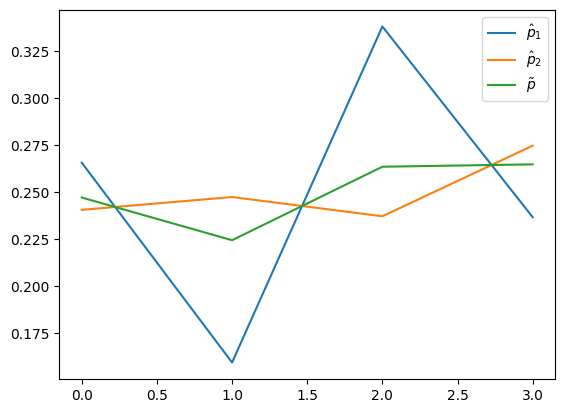

In [67]:
fig, ax = plt.subplots()
ax.plot(p1_hat, label='$\\hat{p}_1$');
ax.plot(p2_hat, label='$\\hat{p}_2$');
ax.plot(p_tilde, label='$\\tilde{p}$');
ax.legend();

In [68]:
lam = 2 * np.sum(X * np.log(p1_hat) + Y * np.log(p2_hat) - (X + Y) * np.log(p_tilde))
lam

np.float64(12.525391029825073)

Using Theorem 10.22, we obtain the p-value:

In [69]:
stats.chi2.sf(lam, 3)

np.float64(0.005783928700160865)

The p-value is below 0.01, so we reject the null hypothesis.

## Exercise 11

We use the likelihood ratio test to check if each of the drugs has an effect on the incidence of nausea.

(a) Let $p_i$ is the probability of having nausea with the drug $i$ and $p_0$ is the probability of having nauses with a placebo. Then the likelihood
$$\mathcal{L}_i(p_0, p_i) = {n_0 \choose x_0} p_0^{x_0} (1 - p_0)^{n_0 - x_0} {n_i \choose x_i} p_i^{x_i} (1 - p_i)^{n_i - x_i}$$
and the log-likelihood is
$$\log \mathcal{L}_i(p_0, p_i) = \log {n_0 \choose x_0} + x_0 \log p_0 + (n_0 - x_0) \log (1 - p_0) + \log {n_i \choose x_i} + x_i \log p_i + (n_i - x_i) \log (1 - p_i).$$
This is maximised by
$$\begin{split}
\hat{p}_0 &= \frac{x_0}{n_0}, \\
\hat{p}_i &= \frac{x_i}{n_i}. \\
\end{split}$$

Under the null hypothesis, $p_i = p_0$, so similarly to Exercise 10, we obtain
$$\tilde{p}_i = \frac{x_0 + x_i}{n_0 + n_i}.$$

The test statistic is
$$\lambda_i = 2 \log \frac{\mathcal{L}_i(\hat{\theta})}{\mathcal{L}(\tilde{\theta})} = 2 (x_0 \log \hat{p}_0 + (n_0 - x_0) \log (1 - \hat{p}_0) + x_i \log \hat{p}_i + (n_i - x_i) \log (1 - \hat{p}_i) - (x_0 + x_i) \log \tilde{p}_i - (n_0 + n_i - x_0 - x_i) \log (1 - \tilde{p}_i)).$$

The dimension of the unrestricted space is $r=2$, and of the restricted space is $q = 1$. The p-value is given by $\mathbb{P}(\chi_{r-q}^2 > \lambda)$.

In [76]:
N = np.array([80, 75, 85, 67, 85])
X = np.array([45, 26, 52, 35, 37])

In [84]:
p_hat = X / N
p_tilde = (X[0] + X[1:]) / (N[0] + N[1:])

In [85]:
lam = 2 * (
    X[0] * np.log(p_hat[0])
    + (N[0] - X[0]) * np.log(1 - p_hat[0])
    + X[1:] * np.log(p_hat[1:])
    + (N[1:] - X[1:]) * np.log(1 - p_hat[1:])
    - (X[0] + X[1:]) * np.log(p_tilde)
    - (N[0] + N[1:] - X[0] - X[1:]) * np.log(1 - p_tilde)
)

The p-values are:

In [91]:
pvalues = stats.chi2.sf(lam, df=1)
pvalues

array([0.00678153, 0.52050746, 0.62675579, 0.10195167])

At the 5% level, we reject the null in the first case (Chlorpromazine), but do not reject in the other three cases.

The odds ratio of not developing nausea after using a drug vs placebo is:

In [117]:
(1 - p_hat[1:]) / p_hat[1:] / ((1 - p_hat[0]) / p_hat[0])

array([2.42307692, 0.81593407, 1.1755102 , 1.66795367])

(b) Using the Bonferroni method, we use the threshold

In [92]:
alpha = 0.05
n_tests = 4

In [93]:
alpha / n_tests

0.0125

This leads to the same conclusion as in (a).

Using the Benjamini-Hochberg method does not change the conclusion in (a) either:

In [97]:
np.sort(pvalues) < np.arange(1, n_tests + 1) / n_tests * alpha

array([ True, False, False, False])

## Exercise 12

(a) If $X_i \sim \text{Poisson}(\lambda)$, then $\overline{X} \approx N(\lambda, \frac{\lambda}{n})$, so the size $\alpha$ Wald test means rejecting the null hypothesis if
$$\frac{|\overline{X} - \lambda_0|}{\widehat{\text{se}}} > z_{\alpha/2},$$
where $\widehat{\text{se}}$ is the standard error.

(b)

In [103]:
lambda0 = 1
n = 20
alpha = 0.05
m = 1000

In [105]:
X = stats.poisson.rvs(size=(m, n), mu=lambda0, random_state=rng)

In [113]:
W = np.abs(np.mean(X, axis=1) - lambda0) / np.std(X, axis=1) * np.sqrt(n)

In [114]:
np.mean(W > stats.norm.ppf(1 - alpha / 2))

np.float64(0.08)

The type I error rate is larger than but close to the desired level.

## Exercise 13

The likelihood of observing $X_1, \dots, X_n$ is
$$\mathcal{L}(\mu,\sigma) 
= \prod_{i=1}^n \frac{1}{\sqrt{2\pi} \sigma} \exp\left\{-\frac{(X_i - \mu)^2}{2\sigma^2}\right\}
= (2\pi)^{-n/2} \sigma^{-n} \exp\left\{-\frac{1}{2\sigma^2}\sum_{i=1}^n (X_i - \mu)^2\right\}$$
and the log-likelihood is
$$\log \mathcal{L}(\mu,\sigma) 
= -\frac{n}{2} \log(2\pi) -n \log \sigma -\frac{1}{2\sigma^2}\sum_{i=1}^n (X_i - \mu)^2.$$
Maximising the log-likelihood leads to the MLE estimates
$$\begin{split}
\hat{\mu} &= \frac{1}{n} \sum_{i=1}^n X_i = \overline{X}, \\
\hat{\sigma} &= \frac{1}{n} \sum_{i=1}^n (X_i - \hat{\mu})^2 = \frac{1}{n} \sum_{i=1}^n (X_i - \overline{X})^2. \\
\end{split}$$
Then
$$\log \mathcal{L}(\hat{\mu},\hat{\sigma})
= -\frac{n}{2} \log(2\pi) -n \log \hat{\sigma} - \frac{n}{2}.$$

Under the null hypothesis
$$\log \mathcal{L}_0(\sigma) 
= -\frac{n}{2} \log(2\pi) -n \log \sigma -\frac{1}{2\sigma^2}\sum_{i=1}^n (X_i - \mu_0)^2.$$
Maximising the log-likelihood leads to the estimate
$$\tilde{\sigma} = \frac{1}{n} \sum_{i=1}^n (X_i - \mu_0)^2.$$
Thus,
$$\log \mathcal{L}_0(\tilde{\sigma}) 
= -\frac{n}{2} \log(2\pi) -n \log \tilde{\sigma} -\frac{n}{2}.$$

The test statistic of the log-likelihood test is
$$\lambda 
= 2 (\log \mathcal{L}(\hat{\mu},\hat{\sigma}) - \log \mathcal{L}_0(\tilde{\sigma}) ) 
= 2n \log \frac{\tilde{\sigma}}{\hat{\sigma}}
= n \log \frac{\sum_{i=1}^n (X_i - \mu_0)^2}{\sum_{i=1}^n (X_i - \overline{X})^2}
= n \log \frac{\sum_{i=1}^n (X_i - \overline{X})^2 + \sum_{i=1}^n (\overline{X} - \mu_0)^2}{\sum_{i=1}^n (X_i - \overline{X})^2}
= n \log \left(1 + n \frac{(\overline{X} - \mu_0)^2}{\sum_{i=1}^n (X_i - \overline{X})^2}\right)
= n \log (1 + \delta^2),$$
where
$$\delta = \frac{\overline{X} - \mu_0}{\sqrt{\frac{1}{n}\sum_{i=1}^n (X_i - \overline{X})^2}}.$$

The p-values of the test is $\mathbb{P}(\chi_1^2 > \lambda)$.

The Wald test uses the test statistic
$$W = \frac{|\overline{X} - \mu_0|}{\sqrt{\frac{1}{n^2}\sum_{i=1}^n (X_i - \overline{X})^2}} 
= \sqrt{n} \frac{|\overline{X} - \mu_0|}{\sqrt{\frac{1}{n}\sum_{i=1}^n (X_i - \overline{X})^2}}
= \sqrt{n} |\delta|.$$
The Wald test is exact rather than asymptotic here, as $\overline{X}$ has a normal distribution.

## Exercise 14

The likelihood in the unrestricted cases was derived in Exercise 13. Under the null hypothesis:
$$\log \mathcal{L}_0(\mu) 
= -\frac{n}{2} \log(2\pi) -n \log \sigma_0 -\frac{1}{2\sigma_0^2}\sum_{i=1}^n (X_i - \mu)^2.$$
Maximising the log-likelihood leads to the estimate
$$\tilde{\mu} = \frac{1}{n} \sum_{i=1}^n X_i = \overline{X} = \hat{\mu}.$$
Thus,
$$\log \mathcal{L}_0(\tilde{\mu}) 
= -\frac{n}{2} \log(2\pi) -n \log \sigma_0 - \frac{1}{2\sigma_0^2} \sum_{i=1}^n (X_i - \tilde{\mu})^2
= -\frac{n}{2} \log(2\pi) -n \log \sigma_0 - \frac{1}{2\sigma_0^2} \sum_{i=1}^n (X_i - \overline{X})^2
.$$

The test statistics in the likelihood test is
$$\lambda 
= 2 (\log \mathcal{L}(\hat{\mu},\hat{\sigma}) - \log \mathcal{L}_0(\tilde{\mu}) )
= 2 \left( n \log \sigma_0 + \frac{1}{2\sigma_0^2} \sum_{i=1}^n (X_i - \overline{X})^2 - n \log \hat{\sigma} - \frac{n}{2}  \right)
= 2 n \left( \log \sigma_0 + \frac{1}{2\sigma_0^2} \hat{\sigma}^2 - \log \hat{\sigma} - \frac{1}{2} \right)
= n \left( \frac{\hat{\sigma}^2}{\sigma_0^2} - \log \frac{\hat{\sigma}^2}{\sigma_0^2}  - 1 \right).
$$

Note that $\hat{\sigma} \leq \sigma_0$. Denote $r = \frac{\hat{\sigma}^2}{\sigma_0^2}$, so $\lambda = n (r - \log r - 1)$. We have $\lambda \to \infty$ if $r \to 0$ or $r \to \infty$, and the derivative $\lambda' = 1 - \frac{1}{r} = 0$ when $r = 1$, so $\lambda$ is smallest when $r = 1$, in which case $\lambda = 0$. Therefore, $\lambda$ is non-negative and increases monotonically with $\sigma_0 \geq \hat{\sigma}$.

We can rewrite the square of the Wald test statistic as
$$W^2 
= \frac{n (\overline{X} - \mu_0)^2}{\frac{1}{n} \sum_{i=1}^n (X_i - \overline{X})^2}
= \frac{\sum_{i=1}^n (\overline{X} - \mu_0)^2}{\frac{1}{n} \sum_{i=1}^n (X_i - \overline{X})^2}
= \frac{\sum_{i=1}^n (X_i - \mu_0)^2 - \sum_{i=1}^n (X_i - \overline{X})^2}{\frac{1}{n} \sum_{i=1}^n (X_i - \overline{X})^2}
= \frac{n \sigma_0^2 - n \hat{\sigma}}{\hat{\sigma}^2}
= n \left(\frac{\sigma_0^2}{\hat{\sigma}^2}- 1\right).
$$
We see that $W^2$ is non-negative and increases monotonically when $\sigma_0 \geq \hat{\sigma}$.

## Exercise 15

Since $X \sim \text{Binomial}(n,p)$, the likelihood of the unrestricted model is given by
$$\mathcal{L}(p) = {n \choose X} p^X (1-p)^{n-X}$$
and the log-likelihood by
$$\log \mathcal{L}(p) = \log {n \choose X} + X \log p + (n-X) \log (1-p),$$
so the MLE estimator of $p$ is
$$\hat{p} = \frac{X}{n}.$$

Under the null hypothesis, the log-likelihood is constant
$$\log \mathcal{L}_0 = \log {n \choose X} + X \log p_0 + (n-X) \log (1-p_0).$$

The test statistic for the likelihood ratio test is
$$\lambda = 2 (\log \mathcal{L}(\hat{p}) - \log \mathcal{L}_0) = 2 \left( X \log \frac{\hat{p}}{p_0} + (n-X) \log \frac{1 - \hat{p}}{1 - p_0} \right).$$

Under the normal approximation for the null hypothesis, $X \approx N(np_0, np_0(1-p_0))$, so 
$$\frac{\frac{X}{n} - p_0}{\sqrt{\frac{p_0(1-p_0)}{n}}} \approx N(0, 1),$$
so the Wald test statistic is
$$W = \frac{\left|\frac{X}{n} - p_0\right|}{\sqrt{\frac{p_0(1-p_0)}{n}}}.$$

## Exercise 16

Suppose we have an i.i.d. sample $X_1, \dots, X_n$ from a distribution with density $f(x;\theta)$. The likelihood is then
$$\mathcal{L}(\theta) = \prod_{i=1}^n f(x_i;\theta)$$
and the log-likelihood
$$l(\theta) = \log \mathcal{L}(\theta) = \sum_{i=1}^n \log f(x_i;\theta).$$
Now,
$$-\frac{1}{n} \frac{\partial^2}{\partial \theta^2} l(\theta)
= - \frac{1}{n} \sum_{i=1}^n \frac{\partial^2}{\partial \theta^2} \log f(x_i;\theta)
\xrightarrow{P} -\mathbb{E}\left[\frac{\partial^2}{\partial \theta^2} \log f(x_i;\theta)\right]
= I(\theta)$$
by the law of large numbers (Theorem 5.6) and Theorem 9.17.

Suppose that the null hypothesis holds and consider the MLE estimator of $\theta$. By Theorem 9.18,
$$\frac{\hat{\theta} - \theta_0}{\widehat{\text{se}}} \rightsquigarrow N(0,1),$$
where
$$\widehat{\text{se}} = \frac{1}{\sqrt{I_n(\hat{\theta})}} = \frac{1}{\sqrt{n I(\hat{\theta})}},$$
so 
$$W = (\hat{\theta} - \theta_0) \sqrt{n I(\hat{\theta})} \rightsquigarrow N(0,1)$$
can be used as the Wald test statistic in accordance with Definition 10.3.

Using the Taylor expansion for the log-likelihood
$$l(\theta_0) 
\approx l(\hat{\theta}) + l'(\hat{\theta})(\theta_0 - \hat{\theta}) + \frac{1}{2} l''(\hat{\theta}) (\theta_0 - \hat{\theta})^2
= l(\hat{\theta}) + \frac{1}{2} l''(\hat{\theta}) (\theta_0 - \hat{\theta})^2,$$
since $l'(\hat{\theta}) = 0$ at the maximum.
The test statistic of the likelihood ratio test is then
$$\lambda = 2 (l(\hat{\theta}) - l(\theta_0)) = -l''(\hat{\theta}) (\theta_0 - \hat{\theta})^2 = -\frac{1}{n} l''(\hat{\theta}) (\sqrt{n}(\theta_0 - \hat{\theta}))^2.$$

We have
$$\frac{W^2}{\lambda} 
=\frac{(\hat{\theta} - \theta_0)^2 n I(\hat{\theta})}{-\frac{1}{n} l''(\hat{\theta}) (\sqrt{n}(\theta_0 - \hat{\theta}))^2}
= \frac{I(\hat{\theta})}{-\frac{1}{n} l''(\hat{\theta})}.$$
As shown above,
$$-\frac{1}{n} l''(\hat{\theta}) \xrightarrow{P} I(\hat{\theta}),$$
so
$$\frac{W^2}{\lambda} \xrightarrow{P} 1.$$